In [1]:
%load_ext autoreload
%autoreload 2

#%pylab notebook
%matplotlib inline
from pylab import *
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
rcParams['figure.dpi'] = 150
rcParams["figure.facecolor"] = 'white'
try:
    import os
    rc('text.latex',preamble=r'\usepackage{/Users/sraghunathan/.configs/apjfonts}')
except:
    pass

In [2]:
import sys, numpy as np, scipy as sc, warnings, os, healpy as H
sys.path.append('/Users/sraghunathan/Research/SPTPol/analysis/git/DRAFT/modules/')
import foregrounds as fg, misc

#import matplotlib.cbook
warnings.filterwarnings('ignore',category=RuntimeWarning)
#warnings.filterwarnings('ignore', category=DeprecationWarning)
#warnings.filterwarnings('ignore', category=matplotlib.cbook.mplDeprecation)

In [3]:
#params
TParr = ['T', 'P']

param_dict = {}

#param_dict['cl_gal_dic_dust_fname'] = 'cls_galactic_sims_dust_CUmilta_20200319_planck_mask.npy'
#param_dict['cl_gal_dic_sync_fname'] = 'cls_galactic_sims_sync_CUmilta_20200319_planck_mask.npy'
#param_dict['cl_gal_dic_dust_fname'] = 'cls_galactic_sims_dust_CUmilta_20200319_maskplanck.npy'

nside, lmax = 2048, 3500
#which_mask = 0
#param_dict['cl_gal_dic_dust_fname'] = 'data/cls_galactic_sims_dust_CUmilta_20200319_maskplanck_nside%s_lmax%s_mask%s.npy' %(nside, lmax, which_mask)
#param_dict['cl_gal_dic_sync_fname'] = 'data/cls_galactic_sims_sync_CUmilta_20200319_maskplanck_nside%s_lmax%s_mask%s.npy' %(nside, lmax, which_mask)

#param_dict['cl_gal_dic_dust_fname'] = 'data/cls_galactic_sims_dust_CUmilta_20200319_maskplanck_nside%s_lmax%s.npy' %(nside, lmax)
#param_dict['cl_gal_dic_sync_fname'] = 'data/cls_galactic_sims_sync_CUmilta_20200319_maskplanck_nside%s_lmax%s.npy' %(nside, lmax)

'''
data_folder = '/Volumes/data_PHD_WD_babbloo/s4/cmbs4/map_based_simulations/202002_foregrounds_extragalactic_cmb_tophat/4096/'
param_dict['cl_gal_dic_dust_fname'] = '%s/dust/0000/cls_galactic_sims_dust_maskplanck_nside%s_lmax%s.npy' %(data_folder, nside, lmax)
param_dict['cl_gal_dic_sync_fname'] = '%s/synchrotron/0000/cls_galactic_sims_sync_maskplanck_nside%s_lmax%s.npy' %(data_folder, nside, lmax)
'''

'''
nside, lmax = 4096, 7000
TParr = ['T']
data_folder = '/Volumes/data_PHD_WD_babbloo/s4/cmbs4/map_based_simulations/202002_foregrounds_extragalactic_cmb_tophat/4096/'
param_dict['cl_gal_dic_dust_fname'] = '%s/dust/0000/lat_steps/cls_galactic_sims_dust_maskplanck_nside%s_lmax%s_TTonly.npy' %(data_folder, nside, lmax)
param_dict['cl_gal_dic_sync_fname'] = '%s/synchrotron/0000/lat_steps/cls_galactic_sims_sync_maskplanck_nside%s_lmax%s_TTonly.npy' %(data_folder, nside, lmax)
'''

nside, lmax = 4096, 7000
TParr = ['T']
data_folder = '/Volumes/data_PHD_WD_babbloo/s4/cmbs4/map_based_simulations/202002_foregrounds_extragalactic_cmb_tophat/4096/'
param_dict['cl_gal_dic_dust_fname'] = '%s/dust/0000/s4like_mask/cls_galactic_sims_dust_nside%s_lmax%s.npy' %(data_folder, nside, lmax)
param_dict['cl_gal_dic_sync_fname'] = '%s/synchrotron/0000/s4like_mask/cls_galactic_sims_sync_nside%s_lmax%s.npy' %(data_folder, nside, lmax)

#S4 specs
specs_dic = {
#freq: [beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_P, elknee_P, alphaknee_P] 
#20: [10.0, None, None, None, None, None, None],
#27: [7.4, 21.8, 471., 3.5, 30.8, 700, 1.4],
#39: [5.1, 12.4, 428., 3.5, 17.6, 700, 1.4], 
93: [2.2, 2.0, 2154., 3.5, 2.9, 700, 1.4],
145: [1.4, 2.0, 4364., 3.5, 2.8, 700, 1.4],
225: [1.0, 6.9, 7334., 3.5, 9.8, 700, 1.4],
278: [0.9, 16.7, 7308., 3.5, 23.6, 700, 1.4],
}
freqarr = sorted( specs_dic.keys() )


param_dict['lmax'] = lmax
param_dict['Dlfile_len'] = '/Users/sraghunathan/Research/SPTPol/analysis/git/DRAFT/data/output_planck_r_0.0_2015_cosmo_lensedCls.dat'

In [4]:
#beam and noise arr
beamarr = []
noisearr_T, elkneearr_T, alphakneearr_T = [], [], []
noisearr_P, elkneearr_P, alphakneearr_P = [], [], []
for freq in freqarr:
    beam_arcmins, white_noise_T, elknee_T, alphaknee_T, whitenoise_P, elknee_P, alphaknee_P = specs_dic[freq]
    beamarr.append(beam_arcmins)
    noisearr_T.append(white_noise_T)
    noisearr_P.append(whitenoise_P)
    elkneearr_T.append(elknee_T)
    elkneearr_P.append(elknee_P)
    alphakneearr_T.append(alphaknee_T)
    alphakneearr_P.append(alphaknee_P)    

print(elkneearr_T)

[2154.0, 4364.0, 7334.0, 7308.0]


In [5]:
#collect beam and noise into a dic; elknee and alpha into a dic
beam_noise_dic = {}
elknee_dic = {}
for TP in TParr:
    beam_noise_dic[TP] = {}
    elknee_dic[TP] = {} 
    if TP == 'T':
        freqarr, beamarr, noisearr, elkneearr, alphakneearr = freqarr, beamarr, noisearr_T, elkneearr_T, alphakneearr_T
    elif TP == 'P':
        freqarr, beamarr, noisearr, elkneearr, alphakneearr = freqarr, beamarr, noisearr_P, elkneearr_P, alphakneearr_P

    for (freq, beam, noise, elknee, alphaknee) in zip(freqarr, beamarr, noisearr, elkneearr, alphakneearr):
        beam_noise_dic[TP][freq] = [beam, noise]
        elknee_dic[TP][freq] = [elknee, alphaknee]

In [6]:
#collect beam and noise into a dic; elknee and alpha into a dic
beam_noise_dic = {}
elknee_dic = {}
for TP in TParr:
    beam_noise_dic[TP] = {}
    elknee_dic[TP] = {} 
    if TP == 'T':
        freqarr, beamarr, noisearr, elkneearr, alphakneearr = freqarr, beamarr, noisearr_T, elkneearr_T, alphakneearr_T
    elif TP == 'P':
        freqarr, beamarr, noisearr, elkneearr, alphakneearr = freqarr, beamarr, noisearr_P, elkneearr_P, alphakneearr_P

    for (freq, beam, noise, elknee, alphaknee) in zip(freqarr, beamarr, noisearr, elkneearr, alphakneearr):
        beam_noise_dic[TP][freq] = [beam, noise]
        elknee_dic[TP][freq] = [elknee, alphaknee]

dict_keys([93, 145, 225, 278])


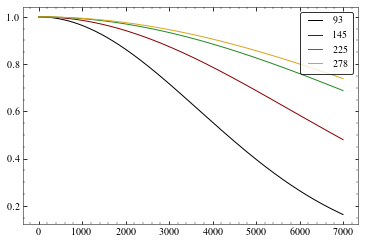

In [7]:
#get beams
bl_dic = misc.get_beam_dic(freqarr, beam_noise_dic['T'], param_dict['lmax'])
print(bl_dic.keys())
if (1):
    for freq in freqarr:
        plot(bl_dic[freq], label = freq)
    legend(loc = 1)

In [8]:
#CAMB output for plotting
camb_file = param_dict['Dlfile_len']
Tcmb = 2.725
el_camb = np.loadtxt(camb_file, usecols = [0])
dl_camb = np.loadtxt(camb_file, usecols = [1,2,3,4])

cl_camb = ( Tcmb**2. * dl_camb * 2 * np.pi ) / ( el_camb[:,None] * (el_camb[:,None] + 1) )
cl_camb *= 1e12
cl_TT, cl_EE, cl_BB, cl_TE = cl_camb.T

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Ad

<Figure size 432x288 with 0 Axes>

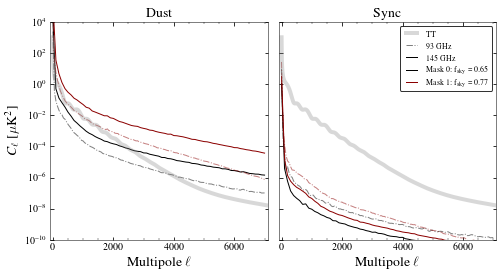

In [10]:
clf()
fig = figure(figsize=(8., 4.))
subplots_adjust(wspace=0.05)
freqarr = [93, 145] ##278]
#alpha_dic = {93: 0.3, 145: 0.6, 225: 0.8, 278: 1.}
alpha_dic = {93: .5, 145: 1., 225: 1., 278: 1.}
lw_dic = {93: 1., 145: 1., 225: 1.5, 278: 2.}
ls_dic = {93: '-.', 145: '-', 225: '--', 278: ':'}

tot_mask_iter = 4
color_dic = {0:'navy', 1: 'green', 2: 'goldenrod', 3: 'darkred'}

tot_mask_iter = 5
color_dic = {0:'navy', 1: 'green', 2: 'goldenrod', 3: 'orangered', 4: 'darkred'}

tot_mask_iter = 2
color_dic = {0:'black', 1: 'darkred'}

for mask_iter in range(tot_mask_iter):
    plot_done = []
    for freq1 in freqarr:
        for freq2 in freqarr:

            if (freq1, freq2) in plot_done: continue
                
            if freq1 != freq2: continue

            try:
                el, cl_dust = fg.get_cl_galactic(param_dict, 'dust', freq1, freq2, which_spec = 'TT', which_gal_mask = mask_iter)
            except:
                cl_dust = None            
                            
            try:
                el, cl_sync = fg.get_cl_galactic(param_dict, 'sync', freq1, freq2, which_spec = 'TT', which_gal_mask = mask_iter)
            except:
                cl_sync = None
                
            if freq1 == 93:
                delta_ell = 50
            elif freq1 == 145:
                delta_ell = 100                         
            el_to_plot = np.arange(min(el), max(el)+1, delta_ell)

            plot_done.append((freq1, freq2))
            lab = '%s: (%s,%s)' %(mask_iter, freq1, freq2)

            lwval = lw_dic[freq1]
            colorval = color_dic[mask_iter]
            alphaval = alpha_dic[freq1]
            lsval = ls_dic[freq1]
            #lwval = 1.
            lab = None
            if cl_dust is not None:
                cl_dust_to_plot = np.interp(el_to_plot, el, cl_dust)
                ax = subplot(1,2,1, yscale = 'log')
                #plot(el, cl_dust, label = lab, lw = lwval, linestyle = lsval, color = colorval, alpha = alphaval)
                plot(el_to_plot, cl_dust_to_plot, label = lab, lw = lwval, linestyle = lsval, color = colorval, alpha = alphaval)
            if cl_sync is not None:
                cl_sync_to_plot = np.interp(el_to_plot, el, cl_sync)                            
                ax = subplot(1,2,2, yscale = 'log')
                #plot(el, cl_sync, label = lab, lw = lwval, linestyle = lsval, color = colorval, alpha = alphaval)
                plot(el_to_plot, cl_sync_to_plot, label = lab, lw = lwval, linestyle = lsval, color = colorval, alpha = alphaval)
    
for cntr, which_comp in enumerate( ['dust', 'sync'] ):
    
    ax = subplot(1,2,cntr+1, yscale = 'log')
    plot(el_camb, cl_TT, 'gray', lw = 4., label = r'TT', alpha = 0.3)
    if cntr == 1: ##0:

        galdustsims_cl = np.load(param_dict['cl_gal_dic_dust_fname'], allow_pickle=1, encoding = 'latin1').item()
        fsky_arr = galdustsims_cl['fsky_arr']
        
        for freq1 in freqarr:
            plot([], [], color = 'k', alpha = alpha_dic[freq1], ls = ls_dic[freq1], label = r'%s GHz' %(freq1))
        for mask_iter in range(tot_mask_iter):
            fsky_val = fsky_arr[mask_iter]
            plot([], [], color = color_dic[mask_iter], label = r'Mask %s: f$_{\rm sky} = %.2f$' %(mask_iter, fsky_val))
            
        #legend(loc = 3, ncol = 2, fontsize = 8)
        legend(loc = 1, ncol = 1, fontsize = 8)
    xlabel(r'Multipole $\ell$', fontsize = 14)
    if cntr == 0:
        ylabel(r'$C_{\ell}\ [\mu {\rm K}^{2}]$', fontsize = 14)
    else:
        setp(ax.get_yticklabels(which = 'both'), visible=False)
    title(r'%s' %(which_comp.capitalize()), fontsize = 14)
    xlim(-100, lmax+100); ylim(1e-10, 1e4)
#savefig('reports/galactic_sims/dust_sync_pspectra.pdf')